In [ ]:
# set main directory name
dir = dirname(pwd());

In [1]:
using DataFrames
using DifferentialEquations
using JumpProcesses
using Plots
# using PlotlyJS
using Statistics
using Distributions
using Random
using JLD2

using Optimization
using OptimizationOptimJL

using CSV
using DataFrames
using DelimitedFiles

# include own module with functionalities
# include("functionalities.jl")
using MyFunctionalities

# set seed for reproducibility
Random.seed!(123);

In [2]:
include("constr_met_likelihoods.jl");

In [3]:
# load data
npat = 500
data_path = joinpath(dirname(pwd()), "data/second_model/ODE_$(npat)_test_patients_noisy.csv")
patient_data = CSV.read(data_path, DataFrame);
p = (beta = 0.3, m_basal = 0.05, m_size = 0.05, d_basal = 0.005, d_size = 0.005, d_metas = 0.01) #(are these the true parameters?)

beta = 0.3
m_basal = 0.05
m_size = 0.05
d_basal = 0.01
d_size = 0.01
d_metas = 0.01
S0 = 0.05
true_θ = [beta, m_basal, m_size, d_basal, d_size, d_metas];


In [4]:
t1 = 25.0
t2 = 25.5
n0 = 0
n = 3
θ_test = [beta, m_basal, m_size, d_basal, d_size, d_metas];

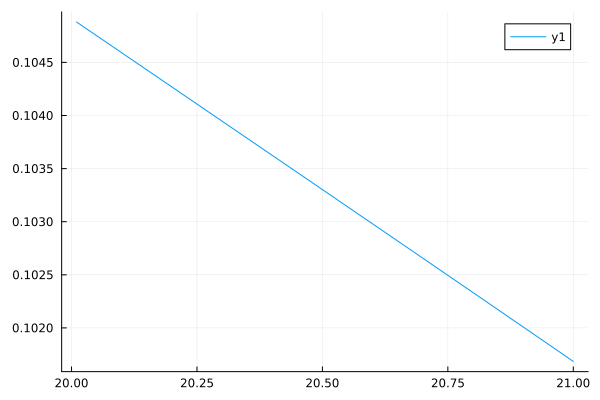

In [5]:
plot(20.01:0.01:21.0, x -> DeathProbability(20.0, x, [beta, m_basal, m_size, d_basal, d_size, d_metas], [0.0,n, 0.0], [0.0, n+2, 0.0], 0.05))

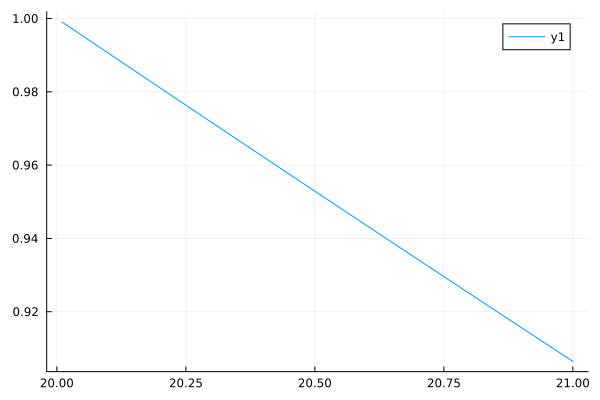

In [6]:
plot(20.01:0.01:21.0, x -> SurvivalProbability(20.0, x, [beta, m_basal, m_size, d_basal, d_size, d_metas], [0.0, n, 0.0], [0.0, n+2, 0.0], 0.05))

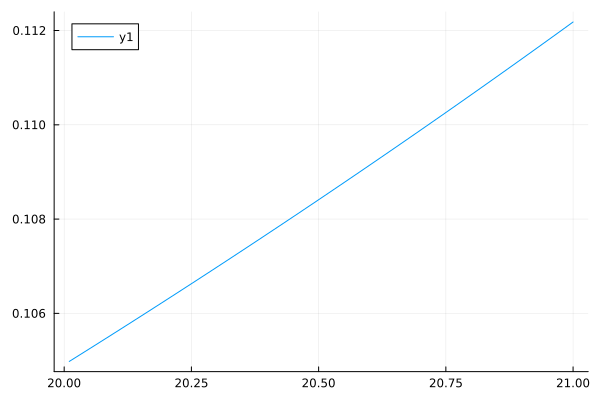

In [7]:
plot(20.01:0.01:21.0, x -> lambdaD(x, beta, d_basal, d_size, d_metas, 0.05, n+2))

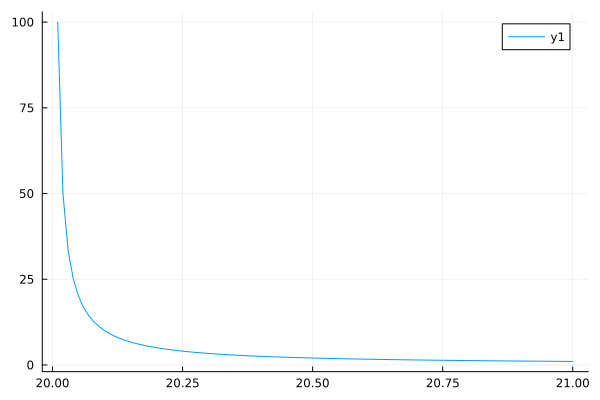

In [8]:
plot(20.01:0.01:21.0, x -> lambdaD(x, beta, d_basal, d_size, d_metas, 0.05, n+2)/LambdaD(20.0, x, beta, d_basal, d_size, d_metas, 0.05, n+2))

In [9]:
lambdaD(20.01, beta, d_basal, d_size, d_metas, 0.05, n+2)/LambdaD(20.0,20.01, beta, d_basal, d_size, d_metas, 0.05, n+2)

100.032128968915

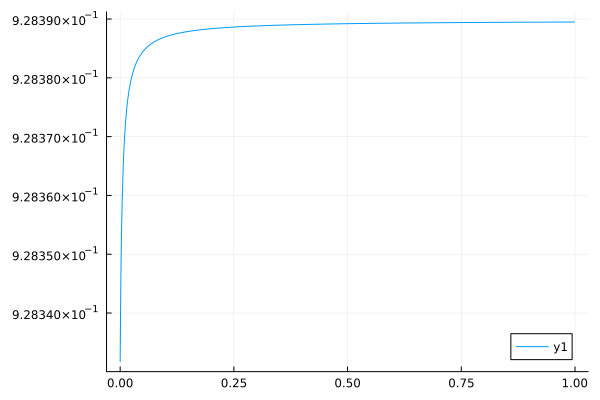

In [10]:
plot(10^-10:0.001:1.0, x -> SurvivalProbability(t1, t2, [beta, m_basal, x, d_basal, d_size, d_metas], [0.0, n, 0.0], [0.0, n+2, 0.0], 0.05))

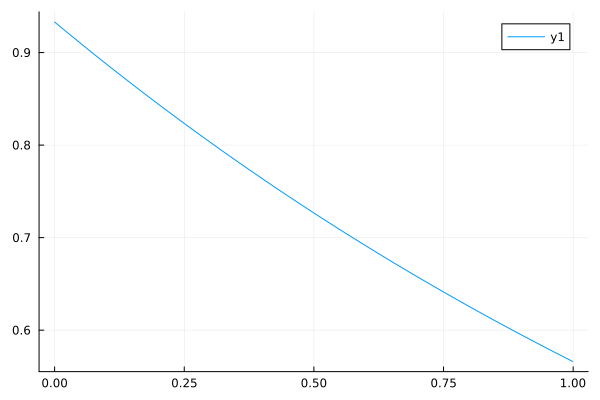

In [11]:
plot(10^-10:0.001:1.0, x -> SurvivalProbability(t1, t2, [beta, m_basal, m_size, x, d_size, d_metas], [0.0, n, 0.0], [0.0, n+2, 0.0], 0.05))

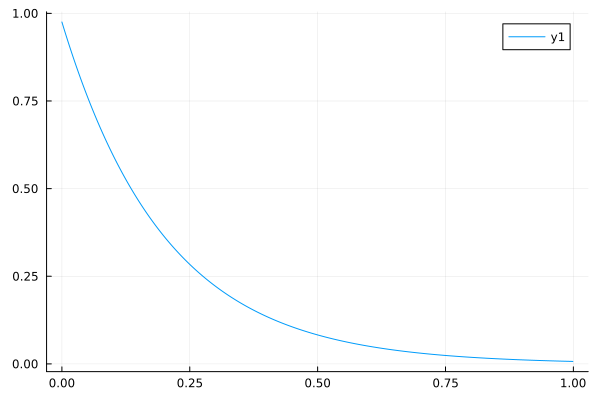

In [12]:
plot(10^-10:0.001:1.0, x ->SurvivalProbability(t1, t2, [beta, m_basal, m_size, d_basal, x, d_metas], [0.0, n, 0.0], [0.0, n+2, 0.0], 0.05))

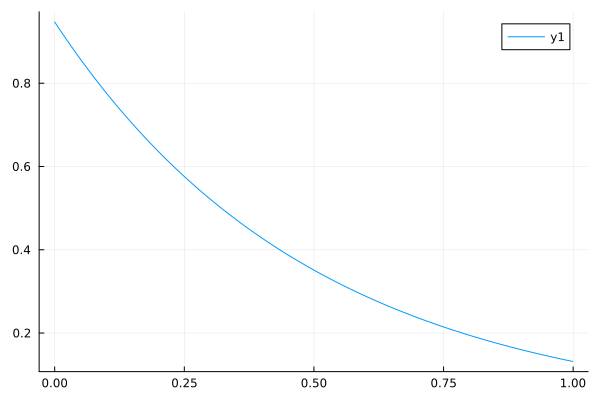

In [13]:
plot(10^-10:0.001:1.0, x -> SurvivalProbability(t1, t2, [beta, m_basal, m_size, d_basal, d_size, x], [0.0, n, 0.0], [0.0, n+2, 0.0], 0.05))

## Plot some kind of likelihood trajectories

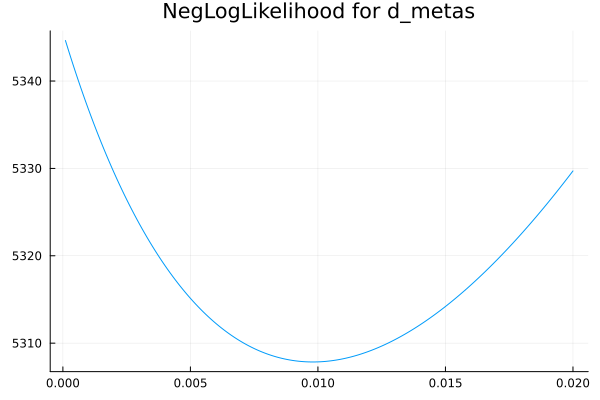

In [19]:
plot(0.0001:0.0001:0.02, x -> NegLogLikelihood([beta, m_basal, m_size, d_basal, d_size, x[1]], patient_data, S0=0.05), legend=false, title="NegLogLikelihood for d_metas")

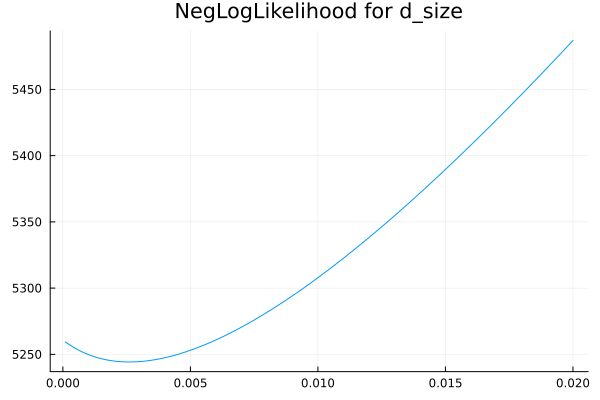

In [18]:
plot(0.0001:0.0001:0.02, x -> NegLogLikelihood([beta, m_basal, m_size, d_basal, x[1], d_metas], patient_data, S0=0.05), legend=false, title="NegLogLikelihood for d_size")

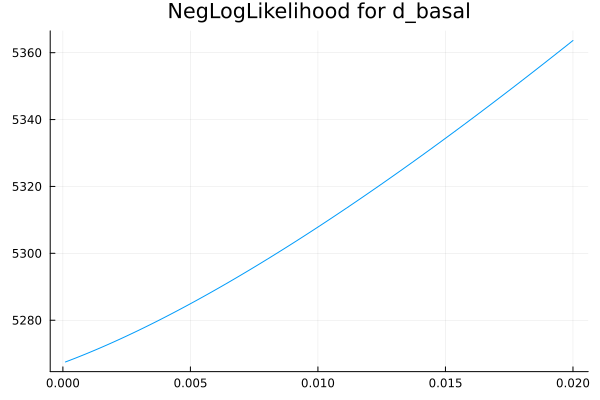

In [17]:
plot(0.0001:0.0001:0.02, x -> NegLogLikelihood([beta, m_basal, m_size, x[1], d_size, d_metas], patient_data, S0=0.05),  legend=false, title="NegLogLikelihood for d_basal")